<a href="https://colab.research.google.com/github/Swatantraraj19/Soil-Analysis-and-Prediction-Using-Machine-Learning-and-VNIR-Spectroscopy-Data/blob/main/Project_ElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Soil Analysis Project/ngp_dataset_copy.csv")

Mounted at /content/drive


<ipython-input-3-2f27bf6325f6>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Soil Analysis Project/ngp_dataset_copy.csv")


In [4]:
data.shape

(258, 2156)

In [5]:
data.head()

,SSN,phExtract,Ec Extract,CaCO3 equivalent %,oc,350,351,352,353,354,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,S1,9.71,8.60,2.13,0.10,0.046108,0.045455,0.047377,0.047641,0.047244,...,0.361984,0.362534,0.367887,0.373615,0.372376,0.368952,0.369218,0.369831,0.368443,0.366677
1,S2,9.31,10.98,2.00,0.16,0.058354,0.056818,0.060466,0.059517,0.056903,...,0.432295,0.431881,0.432052,0.431516,0.430653,0.429207,0.428507,0.427753,0.427360,0.428772
2,S3,10.06,11.40,4.63,0.33,0.054272,0.053030,0.054444,0.054254,0.053800,...,0.383106,0.380261,0.384512,0.392465,0.392107,0.386532,0.382463,0.379579,0.381684,0.384766
3,S4,9.69,7.54,9.13,0.30,0.057146,0.053030,0.054444,0.052904,0.050697,...,0.396354,0.390753,0.391703,0.395259,0.397433,0.400544,0.401183,0.399556,0.398051,0.395273
4,S5,9.75,5.16,12.63,0.25,0.063643,0.064394,0.067533,0.067480,0.066212,...,0.462253,0.463458,0.463963,0.463574,0.464622,0.465143,0.461718,0.457439,0.456462,0.456705


In [6]:
X = data.iloc[:119, 5:].values  # Features (spectroscopy data)
y = data.iloc[:119, 4].values   # Target variable (Soil Organic Carbon)

In [7]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [9]:
# Train ElasticNet model
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.35)
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.35)

In [10]:
# Predict SOC for test set
y_pred = elastic_net.predict(X_test_scaled)

In [11]:
# Compare the Test Set with Predicted Values
comparison_df = pd.DataFrame({'Actual_SOC': y_test.ravel(), 'Predicted_SOC': y_pred.ravel()})
print(comparison_df)

    Actual_SOC  Predicted_SOC
0         0.47       0.419710
1         0.32       0.331337
2         0.25       0.379889
3         0.42       0.381400
4         0.51       0.384669
5         0.19       0.263220
6         0.26       0.331018
7         0.46       0.407841
8         0.44       0.322331
9         0.26       0.306896
10        0.51       0.436947
11        0.11       0.289289
12        0.51       0.376078
13        0.36       0.328525
14        0.51       0.377077
15        0.49       0.397742
16        0.30       0.351400
17        0.10       0.354755
18        0.36       0.336356
19        0.06       0.296469
20        0.57       0.337917
21        0.42       0.351672
22        0.55       0.328709
23        0.49       0.370773


In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.016425780619474622


In [13]:
import math
rmse = math.sqrt(mse)
print("Root Mean Squared Value:", rmse)

Root Mean Squared Value: 0.12816310163020642


In [15]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.2458511640083071


In [17]:
# Import the necessary function
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.1069385924213


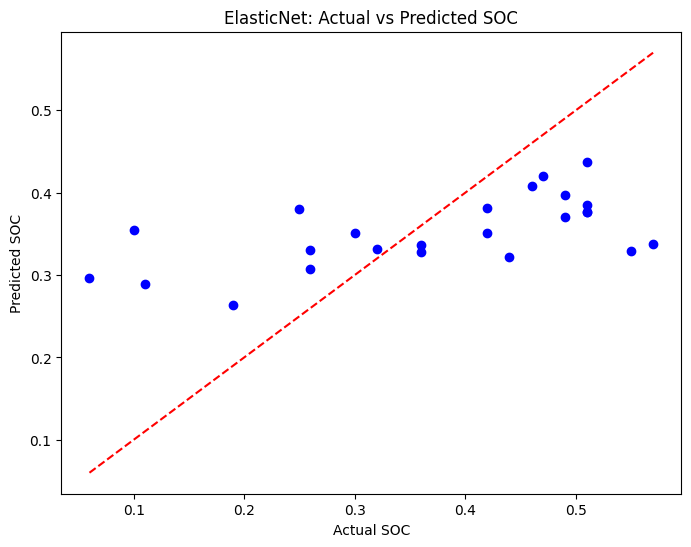

In [14]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted SOC values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual SOC')
plt.ylabel('Predicted SOC')
plt.title('ElasticNet: Actual vs Predicted SOC')
plt.show()